# Explore Raw Measurements

If you have access to the dataset with the raw dataset, this notebook can be used to investigate single measurements.

WARNING: The dataset is not available on the repository and has to be imported

### Imports

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.io import netcdf
import os
import pandas as pd
import xarray as xr

### Load the Data

Load data using ``xarray`` library

In [69]:
ds = xr.open_dataset('./dataset/LD_1900973.nc') # enter the ID you want to explore
ds

<xarray.Dataset> Size: 18kB
Dimensions:      (N_PROF: 1, N_LEVELS: 72, N_LEVELS_2: 200)
Dimensions without coordinates: N_PROF, N_LEVELS, N_LEVELS_2
Data variables: (12/28)
    ID           (N_PROF) float64 8B ...
    PARAM        (N_PROF) |S1 1B ...
    LON          (N_PROF) float64 8B ...
    LAT          (N_PROF) float64 8B ...
    POS_QC       (N_PROF) float64 8B ...
    BAT          (N_PROF) float64 8B ...
    ...           ...
    PSAL_MEDs    (N_PROF, N_LEVELS_2) float64 2kB ...
    PSAL_MINs    (N_PROF, N_LEVELS_2) float64 2kB ...
    PSAL_MAXs    (N_PROF, N_LEVELS_2) float64 2kB ...
    TEMP_MEDs    (N_PROF, N_LEVELS_2) float64 2kB ...
    TEMP_MINs    (N_PROF, N_LEVELS_2) float64 2kB ...
    TEMP_MAXs    (N_PROF, N_LEVELS_2) float64 2kB ...

Plot the temperature 

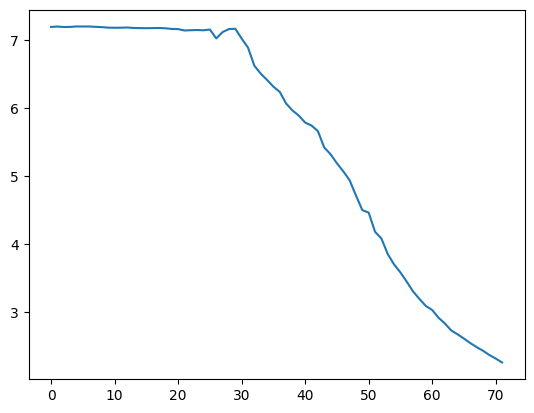

In [37]:
TEMP_ar = np.array(ds['TEMP'])
plt.plot(TEMP_ar.flatten())
plt.show()

Iterate over all files and create dictionary where
* key: list of boyes IDs
* corresponding dataset

In [92]:
ds_n = {}
for filename in os.listdir("./dataset"):
    ds = xr.open_dataset(f'./dataset/{filename}')
    profs = tuple(ds['ID'].values)
    ds_n[profs] = ds
print(f'Number of files processed: {len(ds_n.keys())}')

Number of files processed: 1106
